# Prajwal Kumbar
## K20RU
### 12014961

# Data and Library Imports

In [1]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from mpl_toolkits import mplot3d
import os
import random

In [2]:
%matplotlib inline
sns.set_style("dark")
sns.set_context("paper", font_scale=1.7)

## Importing dataset

In [3]:
salary_df=pd.read_csv("/Users/prajwal/Documents/Python/DS/ds_salaries.csv")

In [4]:
salary_df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [5]:
# Droping the useless column 'Unnamed: 0'
salary_df = salary_df.drop(salary_df.columns[0], axis = 1)

In [6]:
salary_df.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1               JP            S  
2               GB            M  
3               HN            S  
4               US            L

In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [8]:
sns.set_palette("plasma")

# Replacing short forms

In [9]:
salary_df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
salary_df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
salary_df['company_size'].replace({'L':'Large','M':'Medium','S':'Small'},inplace=True)

In [10]:
#Checking for null values
salary_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Description of above code


| Column           | Description |
|------------------| ------------- |
| work_year        | The year the salary was paid.  |
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type  | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance  |
| job_title        | The role worked in during the year.  |
| salary     | The total gross salary amount paid.  |
| salary_currency     | The currency of the salary paid as an ISO 4217 currency code.  |
| salaryinusd    | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).  |
| employee_residence     | Employee's primary country of residence in during the work year as an ISO 3166 country code.  |
| remote_ratio     | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)  |
| company_location     | The country of the employer's main office or contracting branch as an ISO 3166 country code.  |
| company_size     | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)  |



In [11]:
salary_df.describe()

work_year        salary  salary_in_usd  remote_ratio
count   607.000000  6.070000e+02     607.000000     607.00000
mean   2021.405272  3.240001e+05  112297.869852      70.92257
std       0.692133  1.544357e+06   70957.259411      40.70913
min    2020.000000  4.000000e+03    2859.000000       0.00000
25%    2021.000000  7.000000e+04   62726.000000      50.00000
50%    2022.000000  1.150000e+05  101570.000000     100.00000
75%    2022.000000  1.650000e+05  150000.000000     100.00000
max    2022.000000  3.040000e+07  600000.000000     100.00000

In [12]:
salary_df.corr().T

work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.087577       0.170493      0.076314
salary         -0.087577  1.000000      -0.083906     -0.014608
salary_in_usd   0.170493 -0.083906       1.000000      0.132122
remote_ratio    0.076314 -0.014608       0.132122      1.000000

# Multivariate Analysis

**Using Matrix plot or Heatmap**

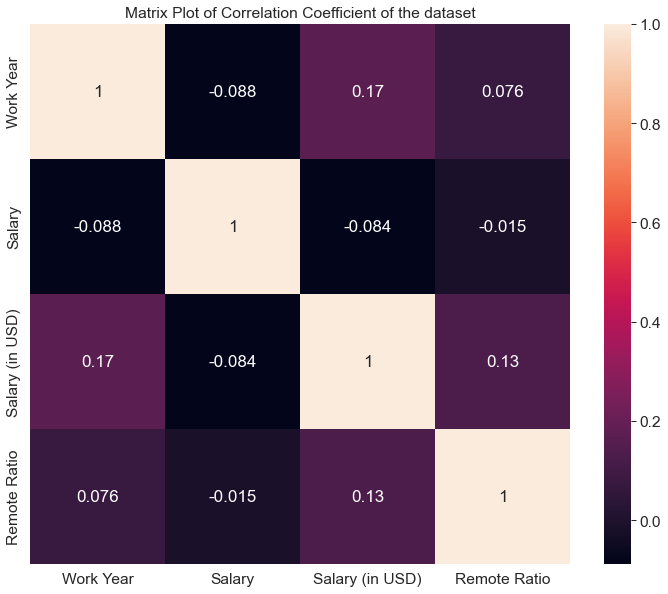

In [13]:
def plot_heatmap():
    corr_df = salary_df.corr()
    fig = plt.figure(figsize=(10, 8), dpi = 75)
    axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    tick_values = ["Work Year", "Salary", "Salary (in USD)", "Remote Ratio"]
    sns.heatmap(corr_df, ax=axes, annot=True, xticklabels = tick_values, yticklabels = tick_values)
    axes.set_title("Matrix Plot of Correlation Coefficient of the dataset", fontdict={"fontsize": 15})
    plt.show()
plot_heatmap()

### Distribution Plots

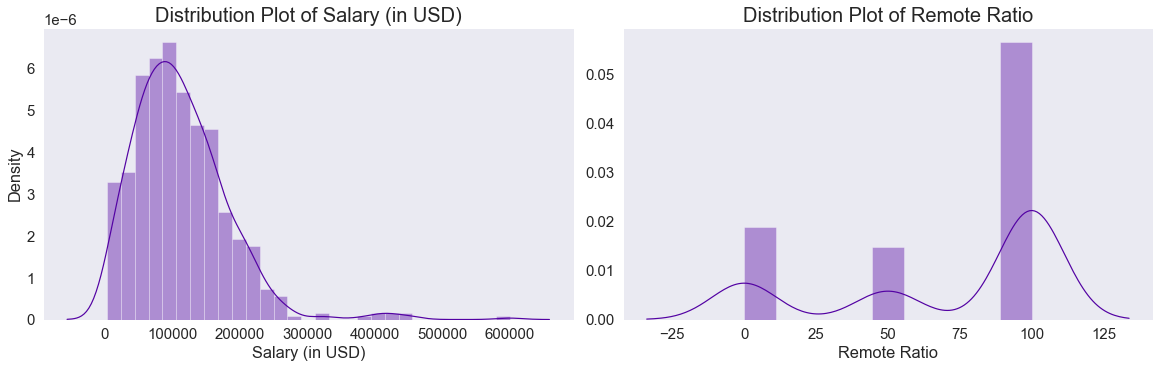

In [14]:
def plot_dist_plot():
    single_item_dimensions = (8, 5)
    numerical_variables = ["salary_in_usd", "remote_ratio"]
    numerical_actual_value = ["Salary (in USD)", "Remote Ratio"]
    nrow = 1
    ncol = len(numerical_variables)
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            sns.distplot(a=salary_df[numerical_variables[x]].values, ax=axes[j])
            axes[j].set_xlabel(numerical_actual_value[x])
            axes[j].set_ylabel("Density" if j == 0 else "")
            axes[j].set_title(f"Distribution Plot of {numerical_actual_value[x]}", fontdict={"fontsize": 20})
plot_dist_plot()

#### By observing **salary graph** we can notice most of them have salary in range 1 Hundred Thousands to 2 Hundred Thousands Dollars
#### By observing **Remote Ratio** we can say most of them are working remotly in Data-Science fieald

### Box Plots

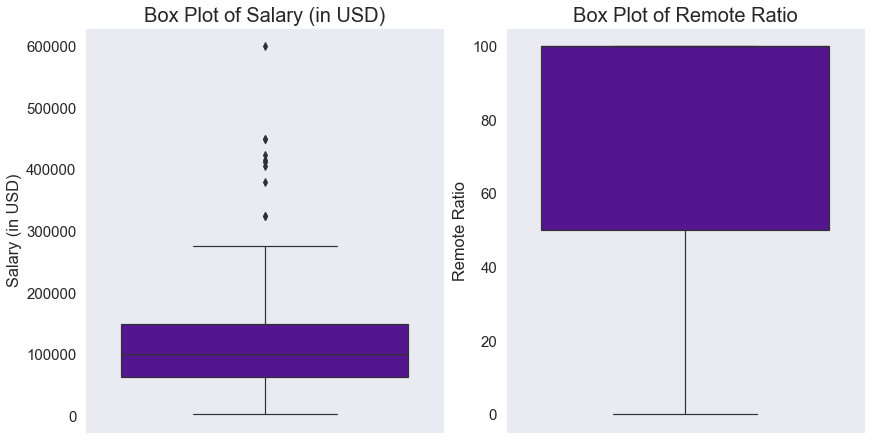

In [15]:
def plot_box_plot():
    single_item_dimensions = (6, 6)
    numerical_variables = ["salary_in_usd", "remote_ratio"]
    numerical_actual_value = ["Salary (in USD)", "Remote Ratio"]
    nrow = 1
    ncol = len(numerical_variables)
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            sns.boxplot(y=numerical_variables[x], data = salary_df, ax=axes[j])
            axes[j].set_ylabel(numerical_actual_value[x])
            axes[j].set_title(f"Box Plot of {numerical_actual_value[x]}", fontdict={"fontsize": 20})
plot_box_plot()

# Categorical Features

## Count plot

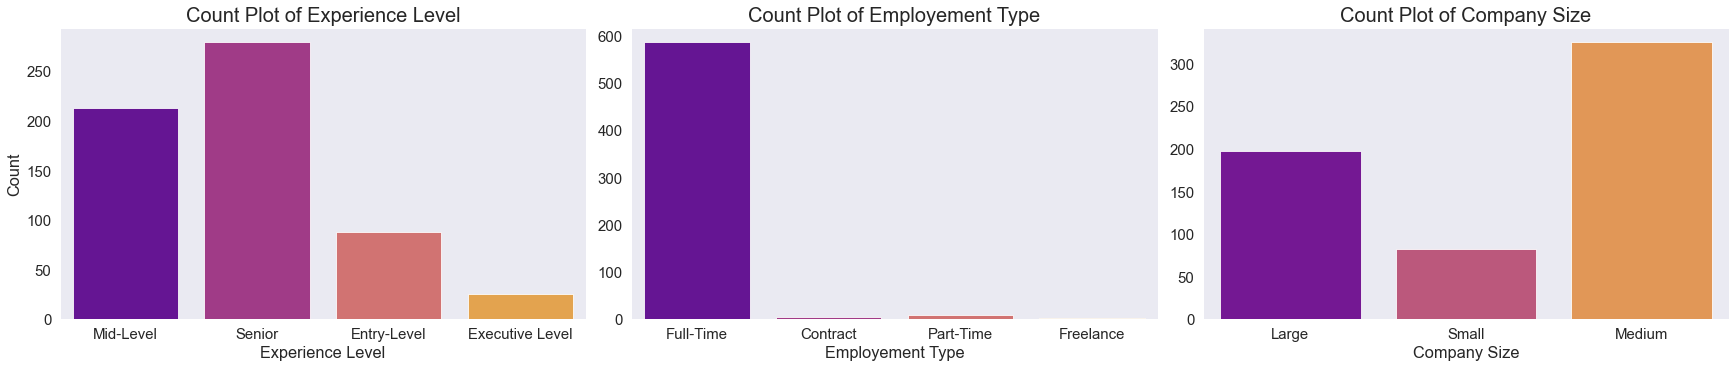

In [16]:
def plot_count_plot(single_item_dimensions, categorical_variables, categorical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            sns.countplot(x=categorical_variables[x], data = salary_df, ax=axes[j], palette="plasma")
            axes[j].set_xlabel(categorical_actual_value[x])
            axes[j].set_ylabel("Count" if j == 0 else "")
            axes[j].set_title(f"Count Plot of {categorical_actual_value[x]}", fontdict={"fontsize": 20})

categorical_variables = ["experience_level", "employment_type", "company_size"]
plot_count_plot(single_item_dimensions = (8, 5), 
                categorical_variables = categorical_variables, 
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"], 
                nrow = 1,
                ncol = len(categorical_variables))

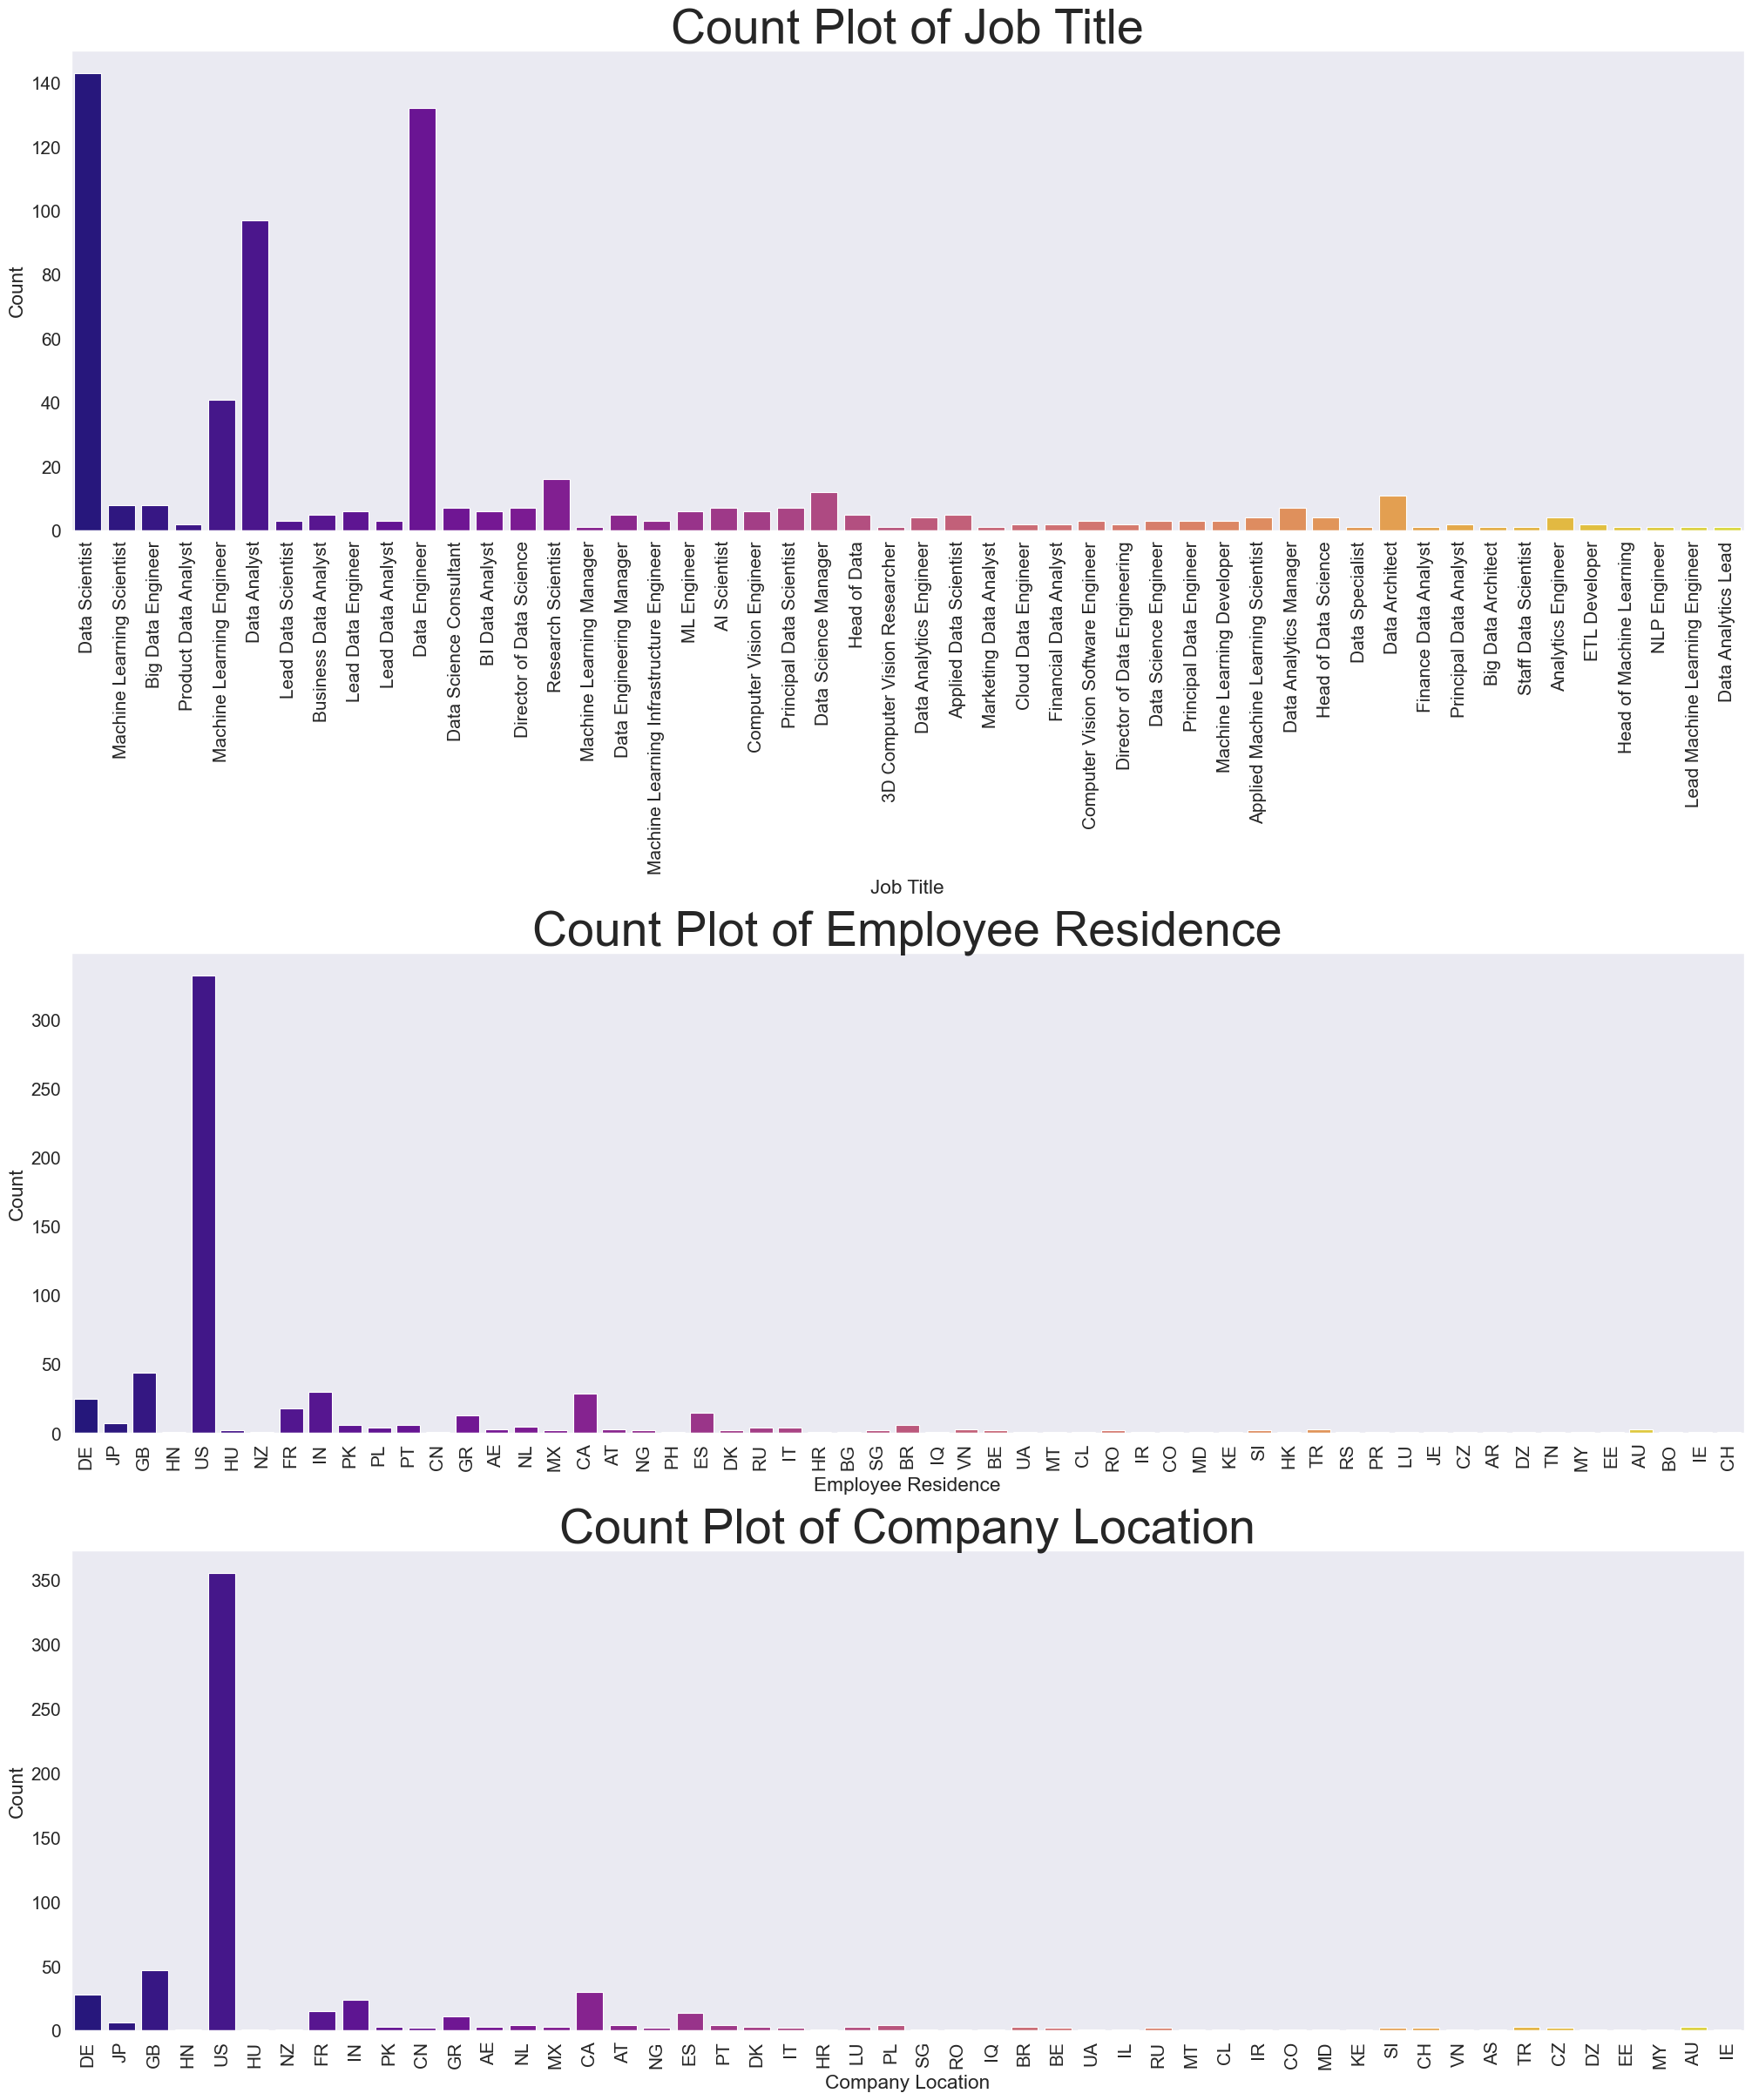

In [17]:
def plot_count_plot2(single_item_dimensions, categorical_variables, categorical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow), dpi=100, constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            x = i
            sns.countplot(x=categorical_variables[x], data = salary_df, ax=axes[i], palette="plasma")
            axes[i].set_xlabel(categorical_actual_value[x])
            axes[i].set_ylabel("Count")
            axes[i].set_title(f"Count Plot of {categorical_actual_value[x]}", fontdict={"fontsize": 40})
            axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=15)
            plt.setp(axes[i].get_xticklabels(), rotation=90)

categorical_variables = ["job_title", "employee_residence", "company_location"]
plot_count_plot2(single_item_dimensions = (20, 8), 
                categorical_variables = categorical_variables, 
                categorical_actual_value = ["Job Title", "Employee Residence", "Company Location"], 
                nrow = 3,
                ncol = 1)

## By vistualizing above charts we can say most of them have job role as "Data Scientste" and "Data Engineer". Residence in US. As well as many company whic are located with this field are in US

## Pie Plot

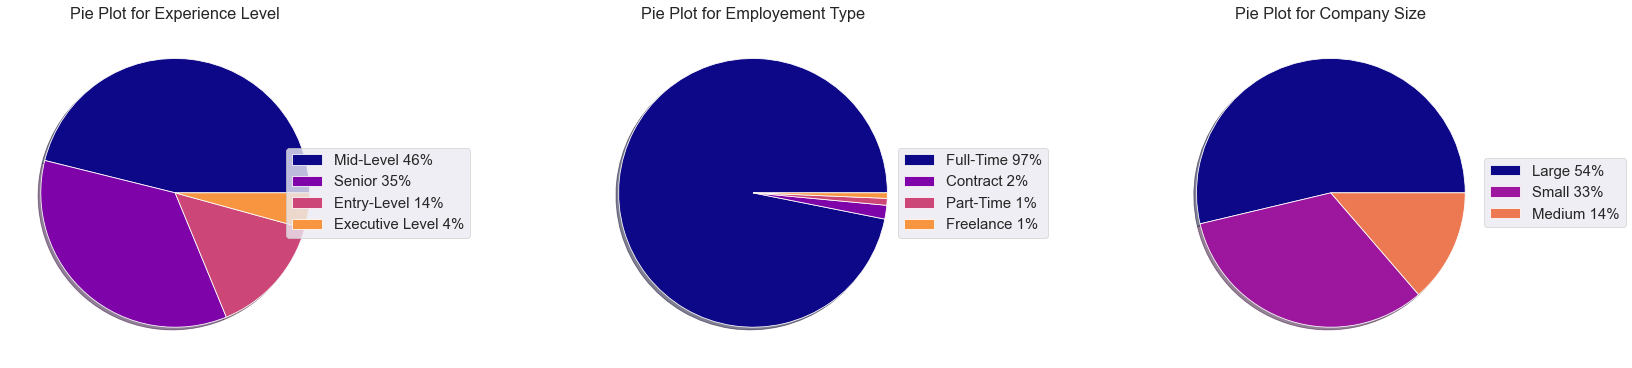

In [18]:
def plot_pie_plot(single_item_dimensions, categorical_variables, categorical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            theme = plt.get_cmap('plasma')
            axes[j].set_prop_cycle("color", [theme(1. * i / len(salary_df[categorical_variables[x]].unique()))
                             for i in range(len(salary_df[categorical_variables[x]].unique()))])
            wedges, texts, autotexts = axes[j].pie(salary_df[categorical_variables[x]].value_counts(), labels=salary_df[categorical_variables[x]].unique(), shadow=True, startangle=0, autopct='%1.0f%%', textprops={"color": "white", "alpha": 0})
            axes[j].legend(loc="right", bbox_to_anchor=[1, 0, 0.4, 1], labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
            axes[j].set_title(f"Pie Plot for {categorical_actual_value[x]}")

categorical_variables = ["experience_level", "employment_type", "company_size"]
plot_pie_plot(single_item_dimensions = (8, 5), 
                categorical_variables = categorical_variables, 
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"], 
                nrow = 1,
                ncol = len(categorical_variables))

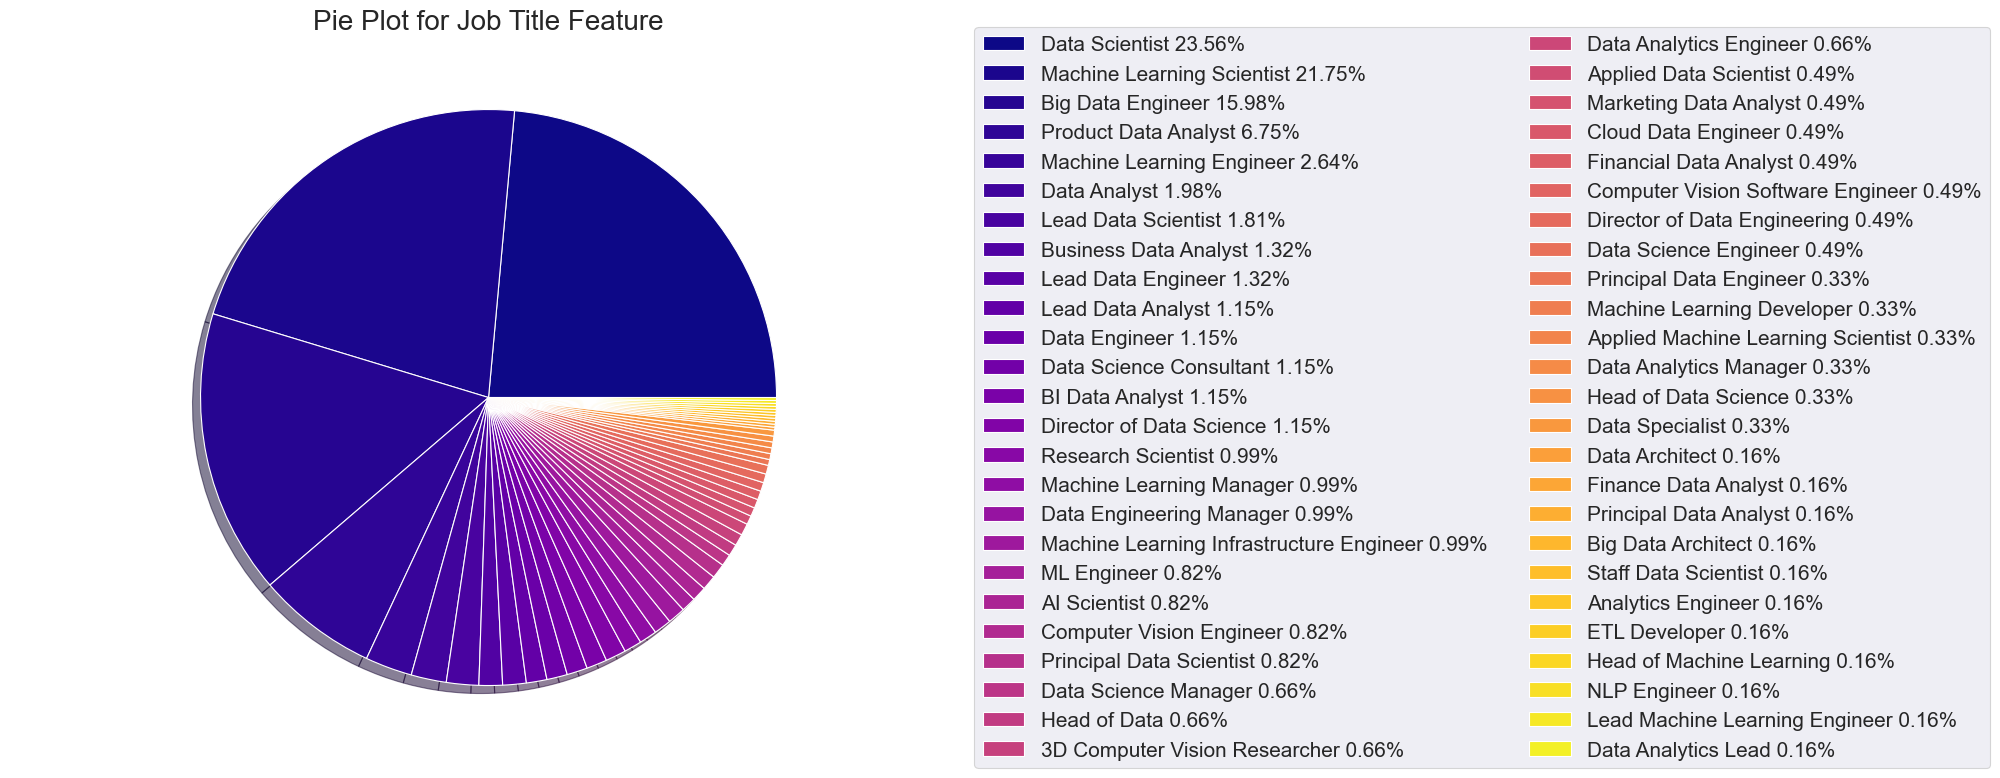

In [19]:
fig = plt.figure(figsize=(10, 8), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salary_df["job_title"].unique()))
                             for i in range(len(salary_df["job_title"].unique()))])
wedges, texts, autotexts = plt.pie(salary_df["job_title"].value_counts(), labels=salary_df["job_title"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 1.6, 1], ncol=2, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Job Title Feature", fontdict={"fontsize": 20})
plt.show()

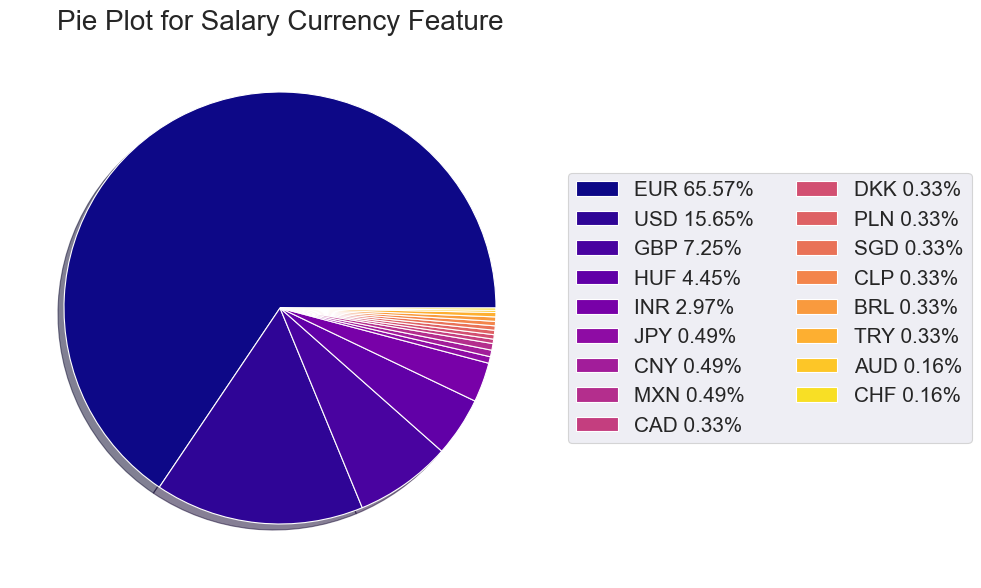

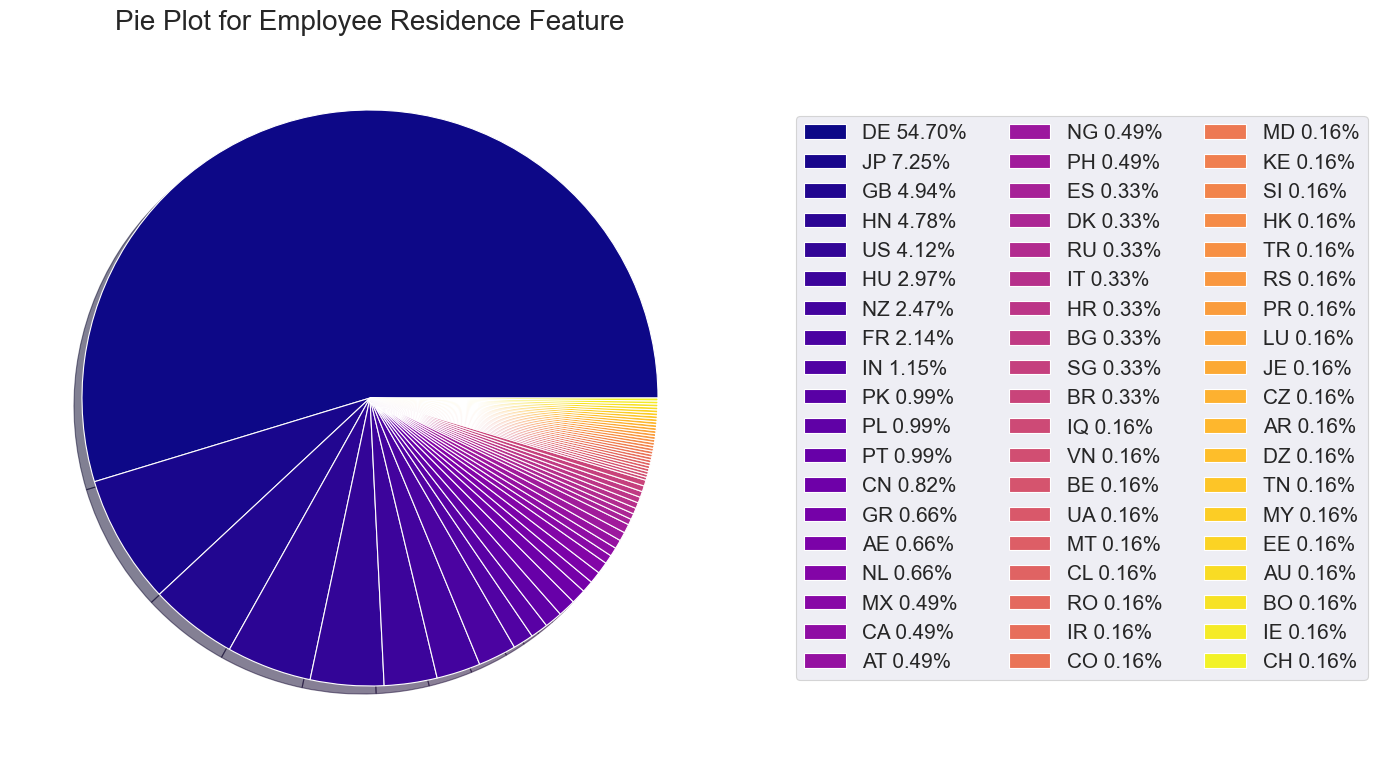

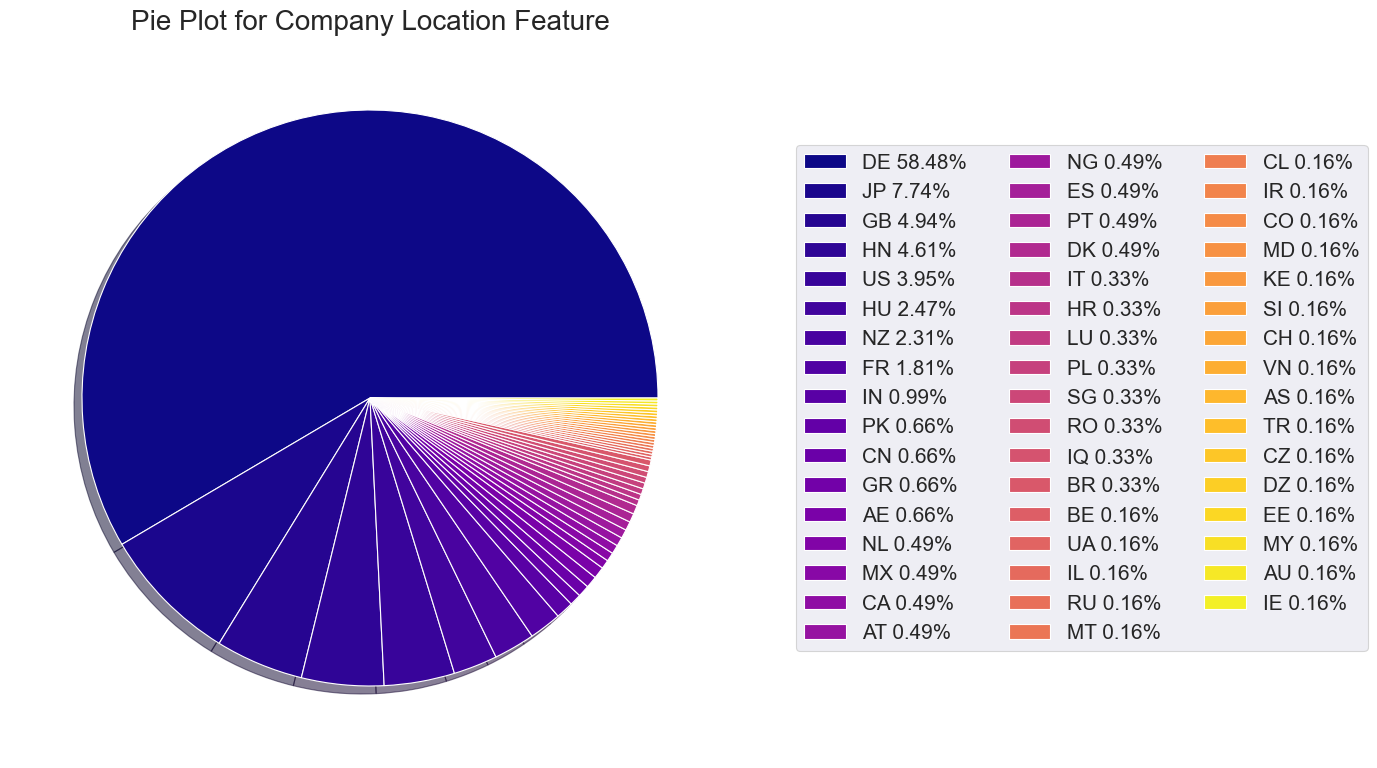

In [20]:
fig = plt.figure(figsize=(8, 6), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salary_df["salary_currency"].unique()))
                             for i in range(len(salary_df["salary_currency"].unique()))])
wedges, texts, autotexts = plt.pie(salary_df["salary_currency"].value_counts(), labels=salary_df["salary_currency"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 0.8, 1], ncol=2, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Salary Currency Feature", fontdict={"fontsize": 20})
plt.show()

fig = plt.figure(figsize=(10, 8), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salary_df["employee_residence"].unique()))
                             for i in range(len(salary_df["employee_residence"].unique()))])
wedges, texts, autotexts = plt.pie(salary_df["employee_residence"].value_counts(), labels=salary_df["employee_residence"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 0.9, 1], ncol=3, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Employee Residence Feature", fontdict={"fontsize": 20})
plt.show()

fig = plt.figure(figsize=(10, 8), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salary_df["company_location"].unique()))
                             for i in range(len(salary_df["company_location"].unique()))])
wedges, texts, autotexts = plt.pie(salary_df["company_location"].value_counts(), labels=salary_df["company_location"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 0.9, 1], ncol=3, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Company Location Feature", fontdict={"fontsize": 20})
plt.show()

# Bivariate Analysis

## Numerical

### Joint Plot

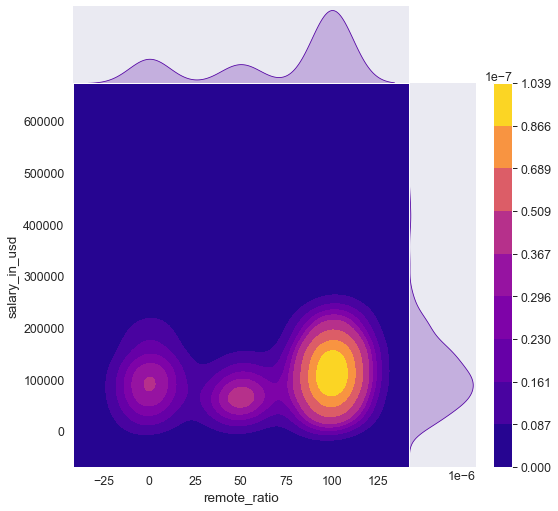

In [21]:
sns.set_context("paper", font_scale=1.4)
jointplot = sns.jointplot(y="salary_in_usd", x="remote_ratio", data=salary_df, kind="kde", space=0, fill=True, thresh=0, cmap='plasma', cbar=True)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = jointplot.ax_joint.get_position()
pos_marg_x_ax = jointplot.ax_marg_x.get_position()
jointplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
jointplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
jointplot.fig.set_size_inches(8, 8)
plt.show()

### Pair Plot

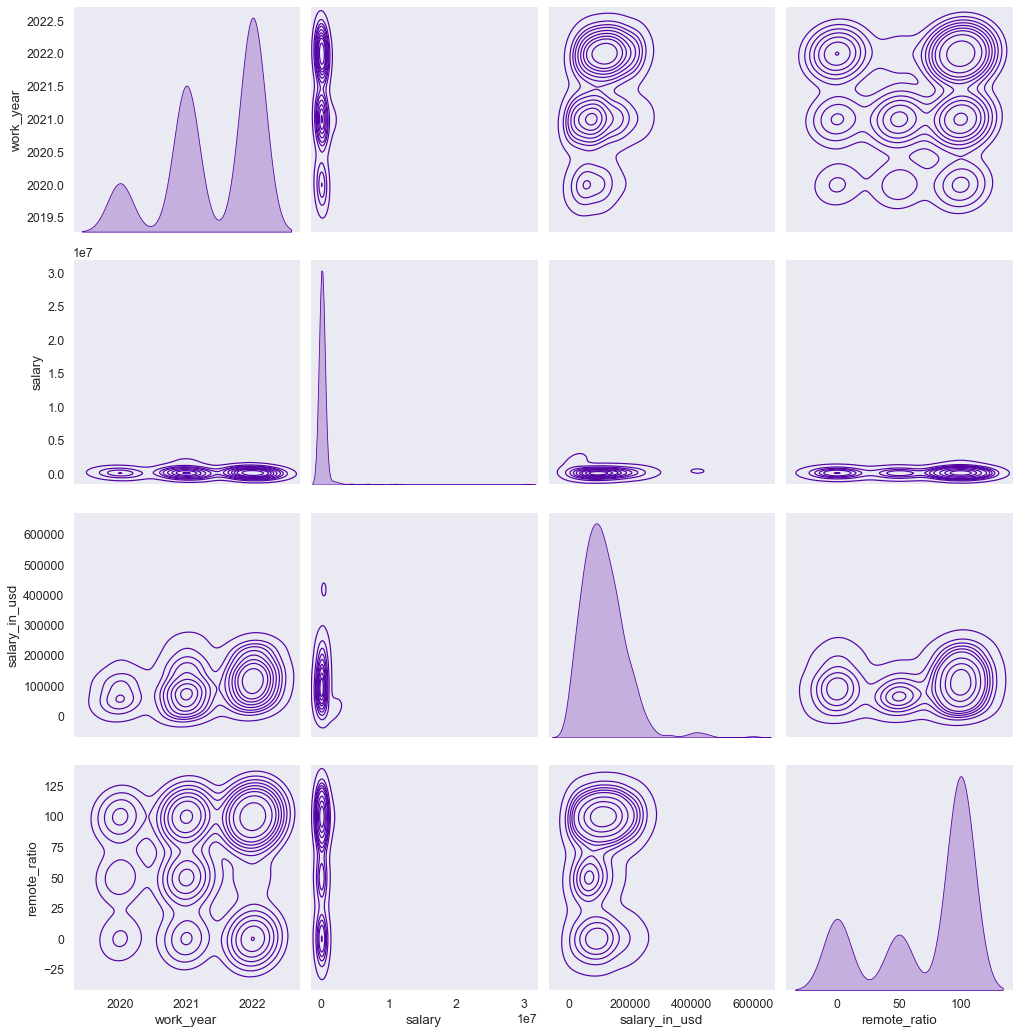

In [22]:
pairplot = sns.pairplot(data=salary_df, kind="kde")
pairplot.fig.set_size_inches(15, 15)
plt.show()

## Categorical

### Violin Plot

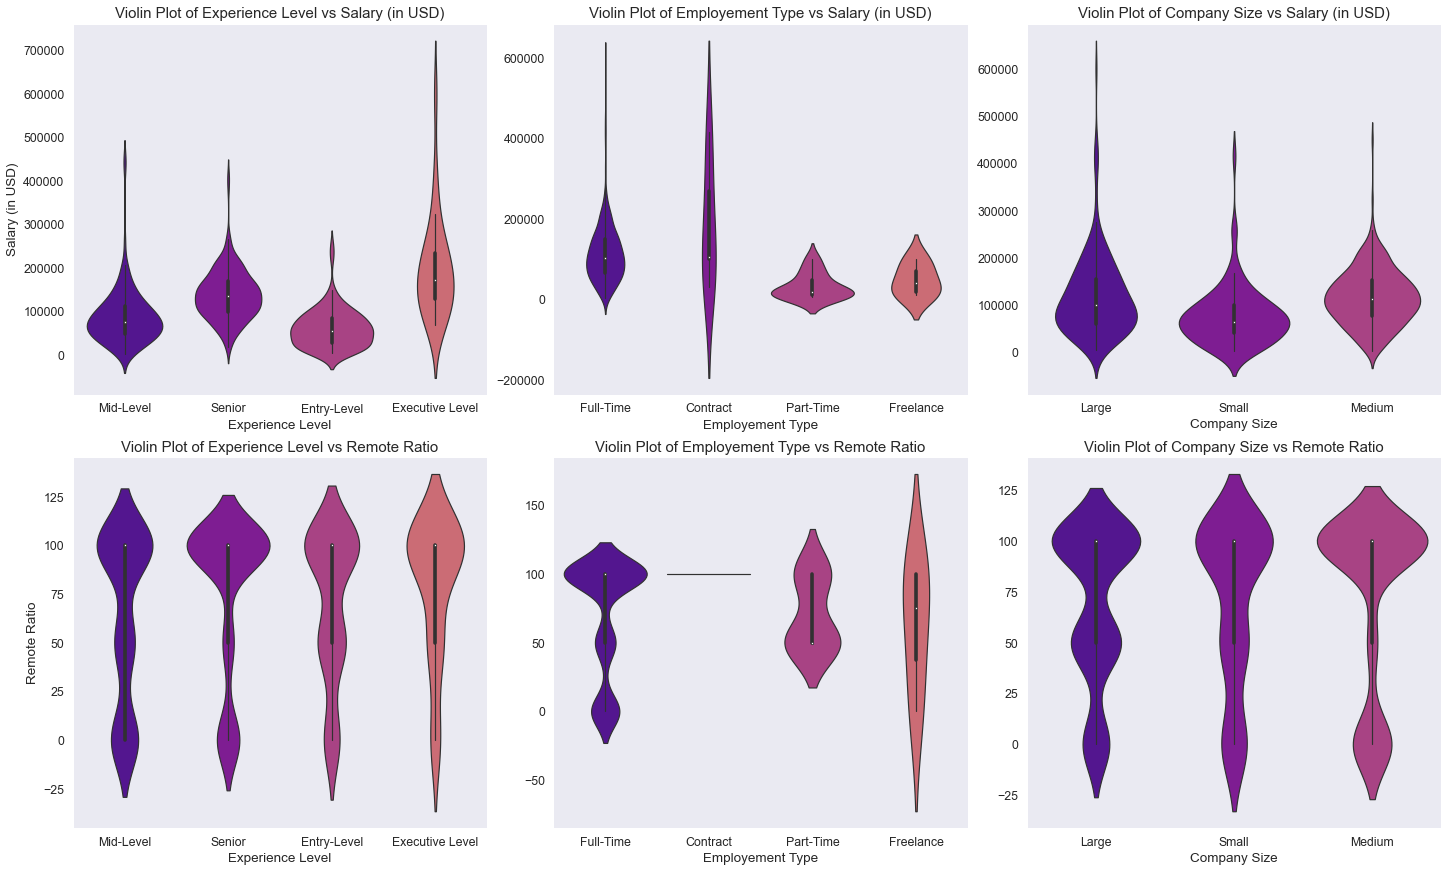

In [23]:
def plot_violin_plot(categorical_variables, categorical_actual_value, numerical_variables, numerical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(20, 12), constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            x = j
            y = i
            sns.violinplot(x=categorical_variables[x], y=numerical_variables[y], data=salary_df, ax=axes[i][j])
            axes[i][j].set_xlabel(categorical_actual_value[x])
            axes[i][j].set_ylabel(numerical_actual_value[y] if j == 0 else "")
            axes[i][j].set_title(f"Violin Plot of {categorical_actual_value[x]} vs {numerical_actual_value[y]}", fontdict={"fontsize": 15})

categorical_variables = ["experience_level", "employment_type", "company_size"]
numerical_variables = ["salary_in_usd", "remote_ratio"]
plot_violin_plot(categorical_variables = categorical_variables,
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"],
                numerical_variables = numerical_variables,
                numerical_actual_value = ["Salary (in USD)", "Remote Ratio"],
                nrow = len(numerical_variables),
                ncol = len(categorical_variables))

### Box Plots

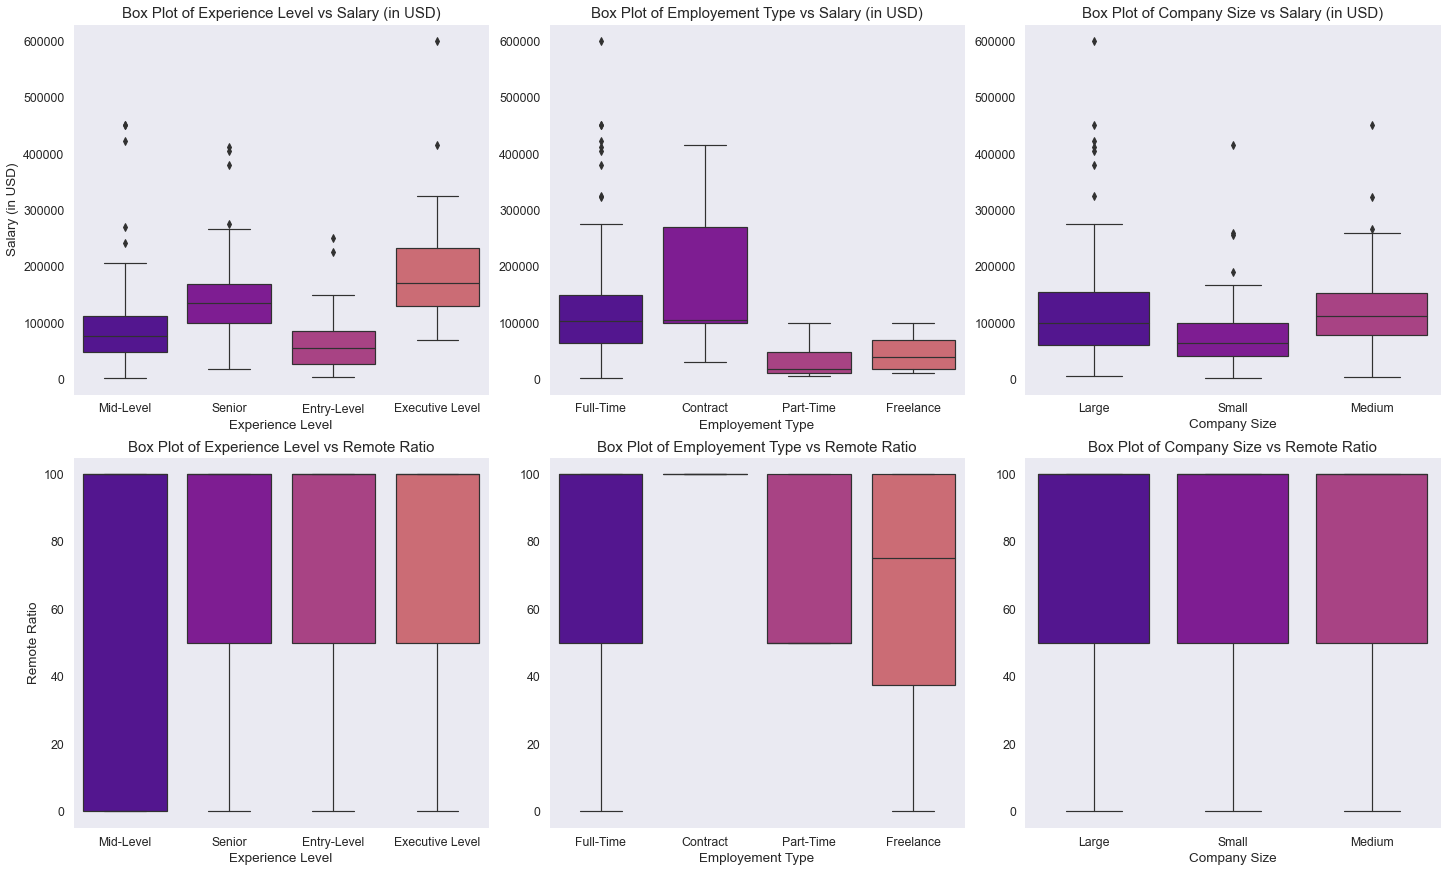

In [24]:
def plot_box_plot(categorical_variables, categorical_actual_value, numerical_variables, numerical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(20, 12), constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            x = j
            y = i
            sns.boxplot(x=categorical_variables[x], y=numerical_variables[y], data=salary_df, ax=axes[i][j])
            axes[i][j].set_xlabel(categorical_actual_value[x])
            axes[i][j].set_ylabel(numerical_actual_value[y] if j == 0 else "")
            axes[i][j].set_title(f"Box Plot of {categorical_actual_value[x]} vs {numerical_actual_value[y]}", fontdict={"fontsize": 15})

categorical_variables = ["experience_level", "employment_type", "company_size"]
numerical_variables = ["salary_in_usd", "remote_ratio"]
plot_box_plot(categorical_variables = categorical_variables,
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"],
                numerical_variables = numerical_variables,
                numerical_actual_value = ["Salary (in USD)", "Remote Ratio"],
                nrow = len(numerical_variables),
                ncol = len(categorical_variables))

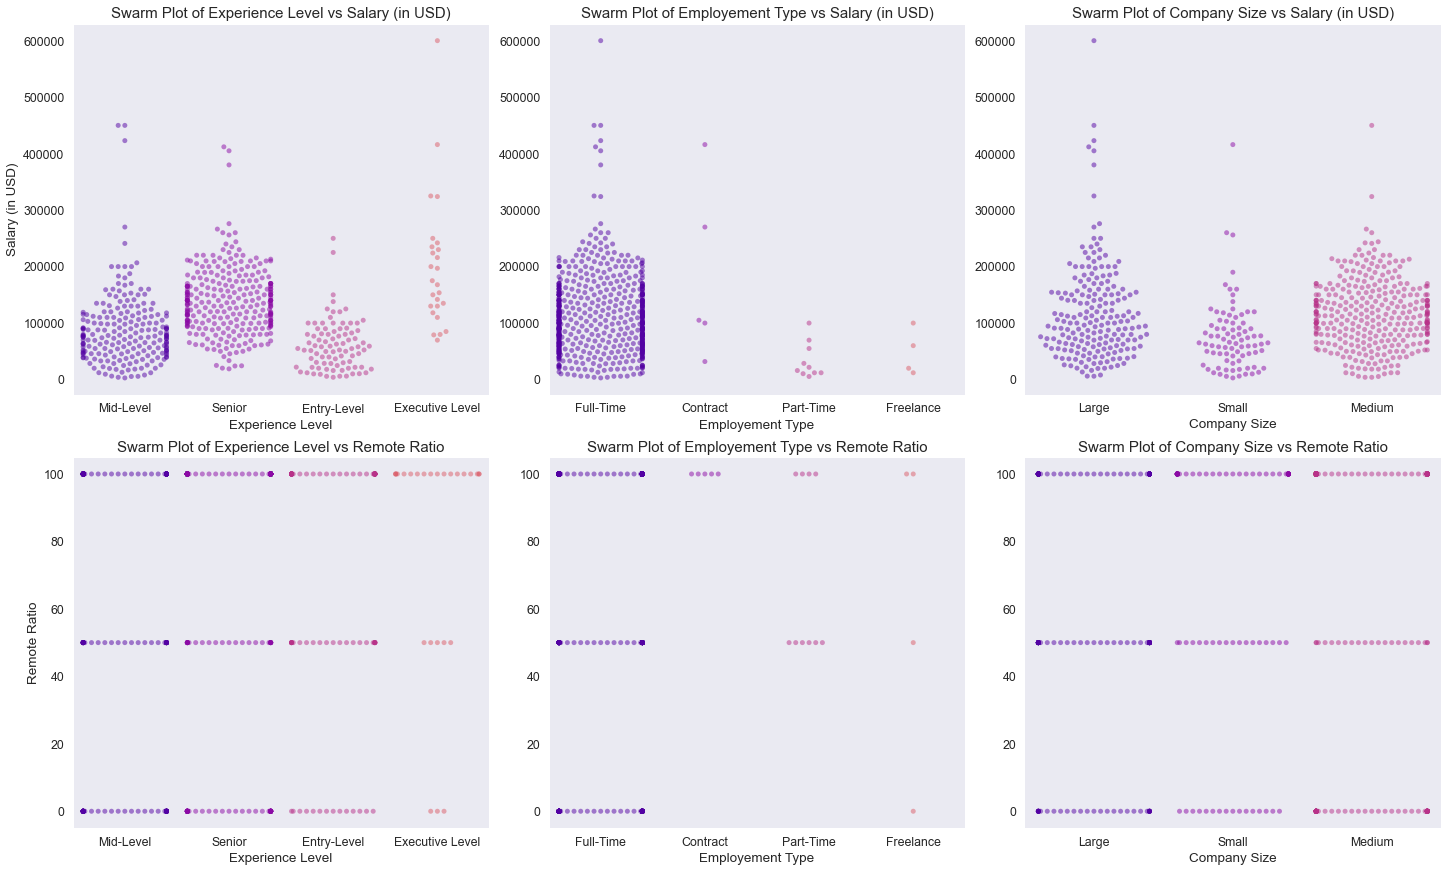

In [25]:
def plot_swarm_plot(categorical_variables, categorical_actual_value, numerical_variables, numerical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(20, 12), constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            x = j
            y = i
            sns.swarmplot(x=categorical_variables[x], y=numerical_variables[y], data=salary_df, ax=axes[i][j], alpha=0.5)
            axes[i][j].set_xlabel(categorical_actual_value[x])
            axes[i][j].set_ylabel(numerical_actual_value[y] if j == 0 else "")
            axes[i][j].set_title(f"Swarm Plot of {categorical_actual_value[x]} vs {numerical_actual_value[y]}", fontdict={"fontsize": 15})

categorical_variables = ["experience_level", "employment_type", "company_size"]
numerical_variables = ["salary_in_usd", "remote_ratio"]
plot_swarm_plot(categorical_variables = categorical_variables,
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"],
                numerical_variables = numerical_variables,
                numerical_actual_value = ["Salary (in USD)", "Remote Ratio"],
                nrow = len(numerical_variables),
                ncol = len(categorical_variables))

In [26]:
px.funnel(salary_df.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(15),y='company_location',x='experience_level',color_discrete_sequence=['rebeccapurple'],labels={'experience_level':'count'},template='seaborn',title='<b> Top 15 Countries having maximum Data Science Jobs')

In [27]:
fig=px.treemap(salary_df,path=[px.Constant('Job Roles'),'job_title','company_location','experience_level'],template='ggplot2',hover_name='job_title',title='<b>TreeMap of Different Roles in Data Science with Experience Level')
fig.update_traces(root_color='lightgrey')